Fruits are available at some positions on an infinite x-axis. You are given a 2D integer array fruits where fruits[i] = [positioni, amounti] depicts amounti fruits at the position positioni. fruits is already sorted by positioni in ascending order, and each positioni is unique.

You are also given an integer startPos and an integer k. Initially, you are at the position startPos. From any position, you can either walk to the left or right. It takes one step to move one unit on the x-axis, and you can walk at most k steps in total. For every position you reach, you harvest all the fruits at that position, and the fruits will disappear from that position.

Return the maximum total number of fruits you can harvest.

 

Example 1:

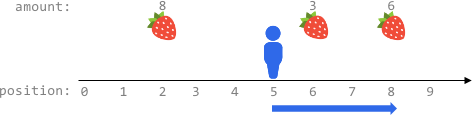

Input: fruits = [[2,8],[6,3],[8,6]], startPos = 5, k = 4
Output: 9
Explanation: 
The optimal way is to:
- Move right to position 6 and harvest 3 fruits
- Move right to position 8 and harvest 6 fruits
You moved 3 steps and harvested 3 + 6 = 9 fruits in total.

Example 2:

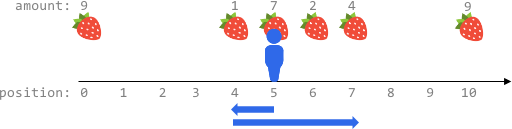

Input: fruits = [[0,9],[4,1],[5,7],[6,2],[7,4],[10,9]], startPos = 5, k = 4
Output: 14
Explanation: 
You can move at most k = 4 steps, so you cannot reach position 0 nor 10.
The optimal way is to:
- Harvest the 7 fruits at the starting position 5
- Move left to position 4 and harvest 1 fruit
- Move right to position 6 and harvest 2 fruits
- Move right to position 7 and harvest 4 fruits
You moved 1 + 3 = 4 steps and harvested 7 + 1 + 2 + 4 = 14 fruits in total.

Example 3:

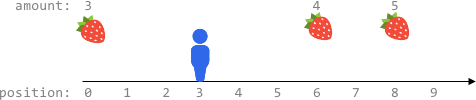

Input: fruits = [[0,3],[6,4],[8,5]], startPos = 3, k = 2
Output: 0
Explanation:
You can move at most k = 2 steps and cannot reach any position with fruits.

 

Constraints:

    1 <= fruits.length <= 105
    fruits[i].length == 2
    0 <= startPos, positioni <= 2 * 105
    positioni-1 < positioni for any i > 0 (0-indexed)
    1 <= amounti <= 104
    0 <= k <= 2 * 105



In [ ]:
class Solution:
    def maxTotalFruits(self, fruits: List[List[int]], startPos: int, k: int) -> int:
        positions = [e[0] for e in fruits]
        num_fruits = [0] + [e[1] for e in fruits]
        for i in range(1, len(num_fruits)):
            num_fruits[i] += num_fruits[i - 1]
        
        ans = 0
        for steps in range (k // 2 + 1):
            l_pos = startPos - steps
            r_pos = startPos + (k - 2 * steps)
            start = bisect_left(positions, l_pos)
            end = bisect_right(positions, r_pos)
            ans = max(
                ans, 
                num_fruits[end] - num_fruits[start]
            )
            
            r_pos = startPos + steps
            l_pos = startPos - (k - 2 * steps)
            start = bisect_left(positions, l_pos)
            end = bisect_right(positions, r_pos)
            ans = max(
                ans, 
                num_fruits[end] - num_fruits[start]
            )
        return ans